[[0.         0.34722222 0.43055556 0.         0.         0.22222222]
 [0.34722222 0.         0.         0.34722222 0.13888889 0.16666667]
 [0.28703704 0.         0.         0.28703704 0.14814815 0.27777778]
 [0.         0.23148148 0.28703704 0.         0.         0.48148148]
 [0.         0.13888889 0.22222222 0.         0.         0.63888889]
 [0.         0.         0.         0.         0.         1.        ]]
P100= [[1.20319570e-06 0.00000000e+00 0.00000000e+00 1.20319570e-06
  5.52998905e-07 9.99997041e-01]
 [0.00000000e+00 1.08366132e-06 1.38249726e-06 0.00000000e+00
  0.00000000e+00 9.99997534e-01]
 [0.00000000e+00 9.21664841e-07 1.17582781e-06 0.00000000e+00
  0.00000000e+00 9.99997903e-01]
 [8.02130466e-07 0.00000000e+00 0.00000000e+00 8.02130466e-07
  3.68665936e-07 9.99998027e-01]
 [5.52998905e-07 0.00000000e+00 0.00000000e+00 5.52998905e-07
  2.54162967e-07 9.99998640e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


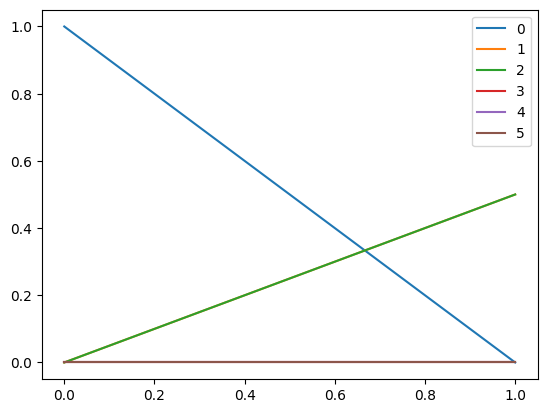

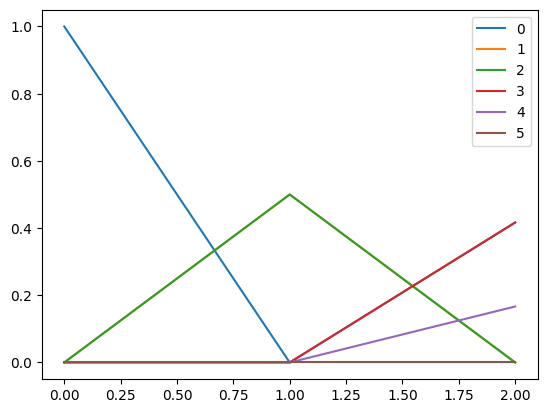

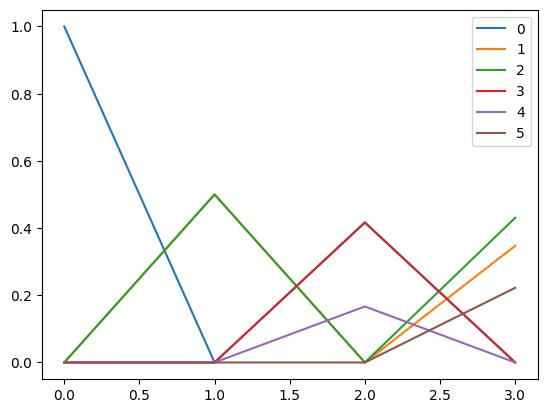

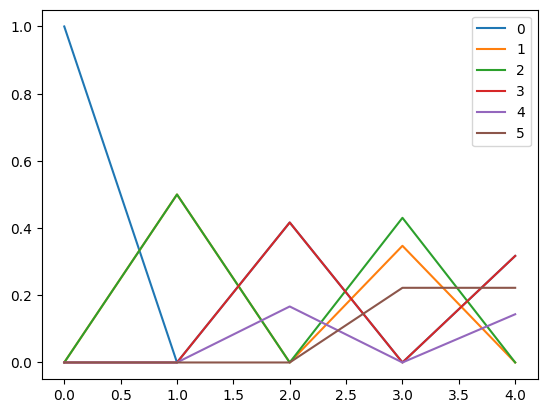

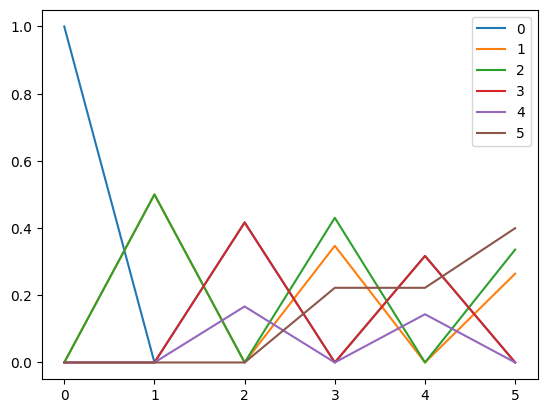

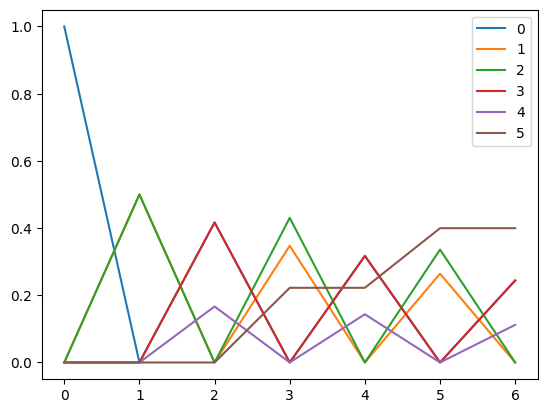

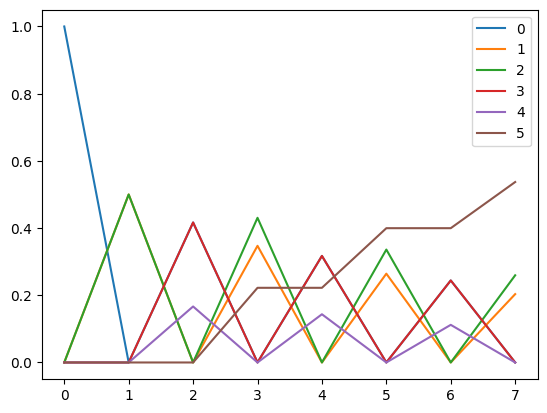

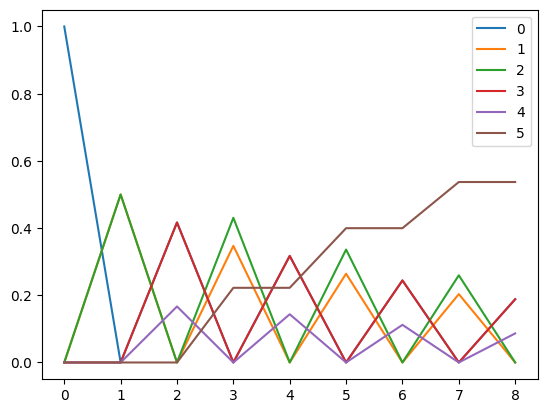

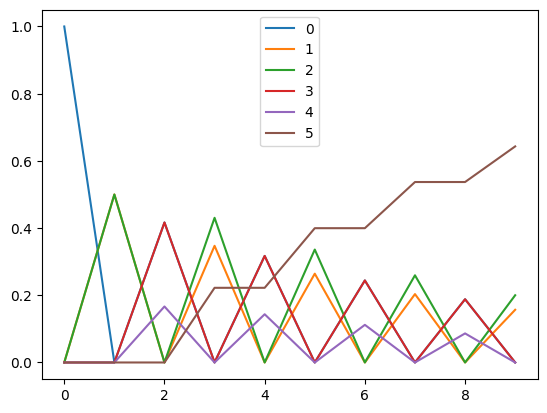

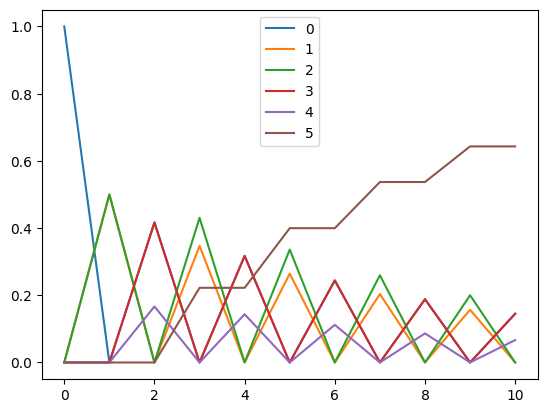

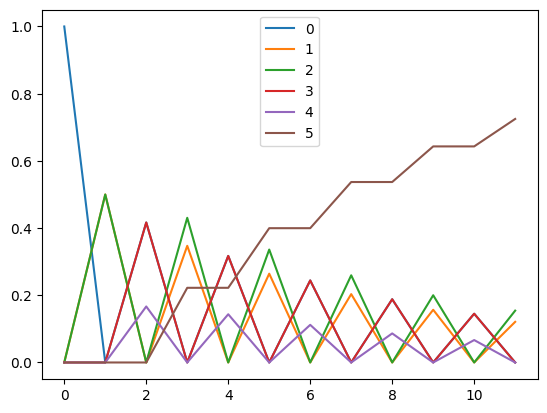

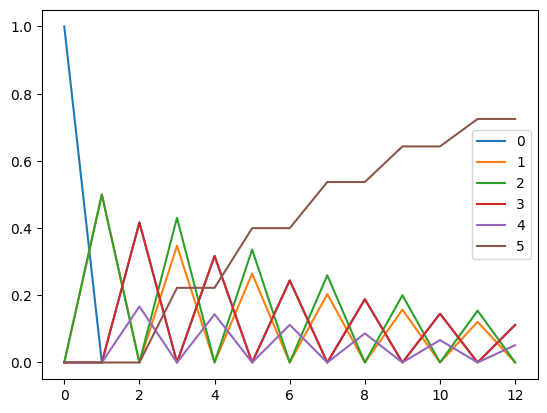

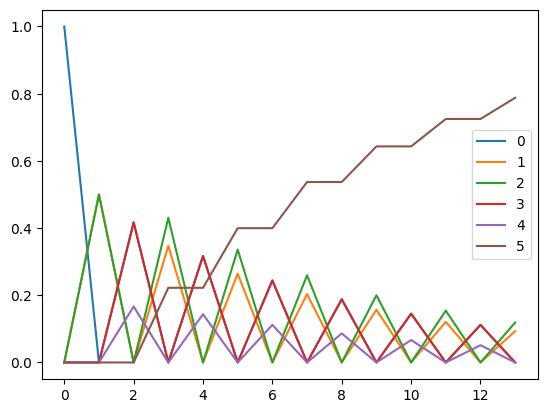

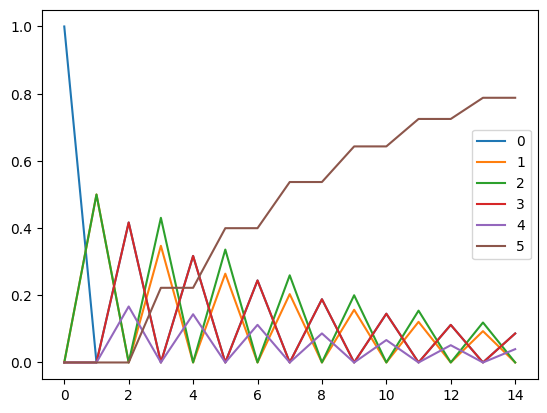

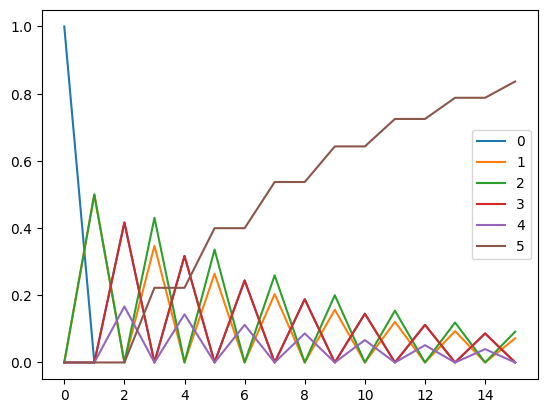

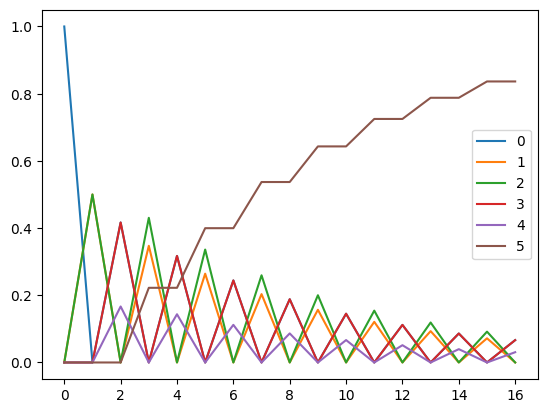

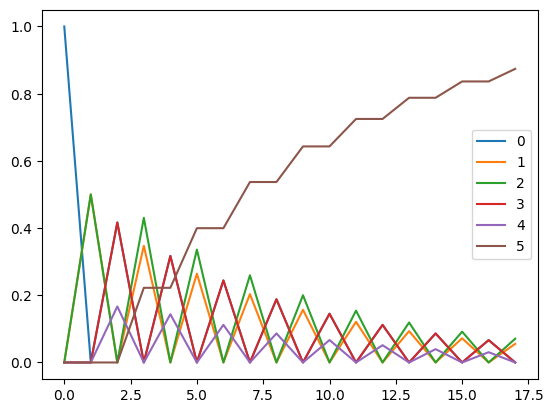

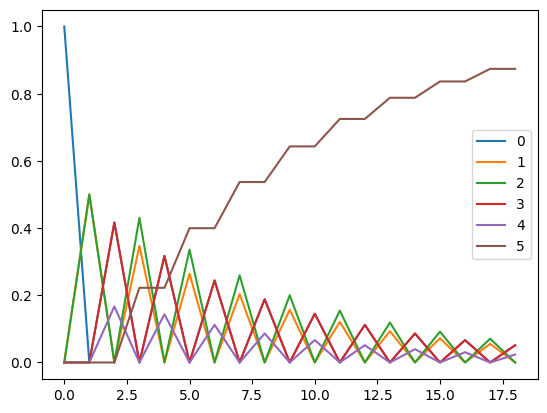

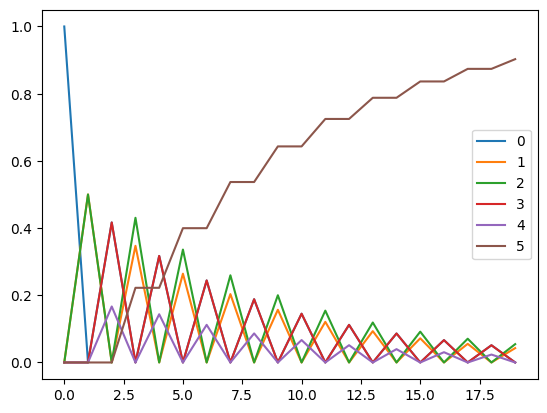

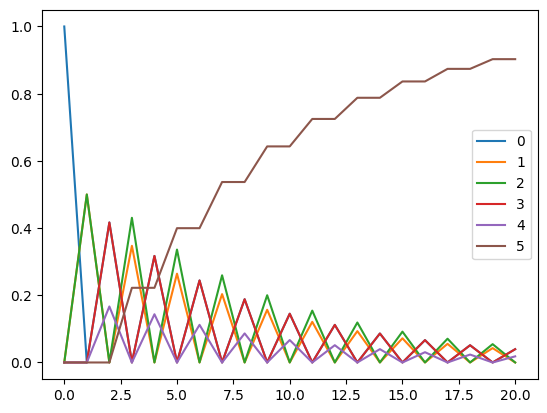

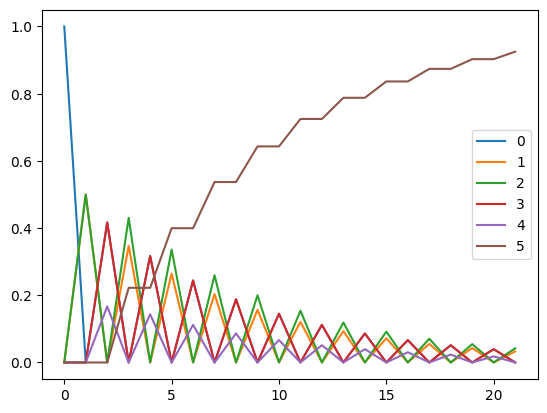

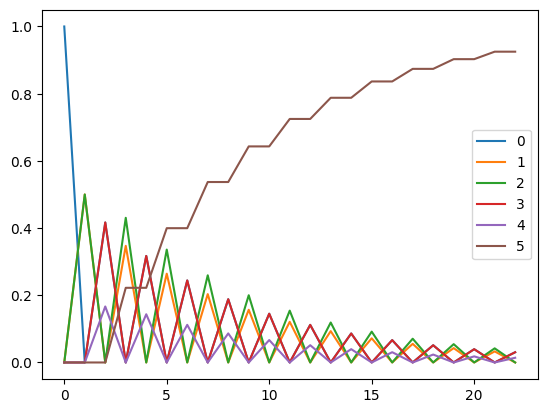

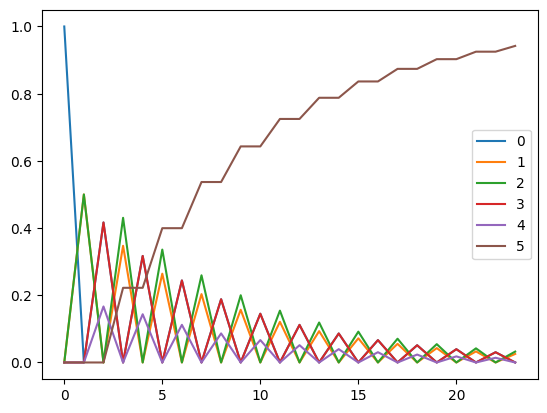

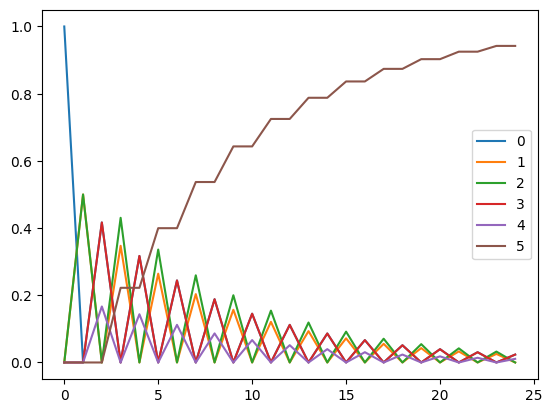

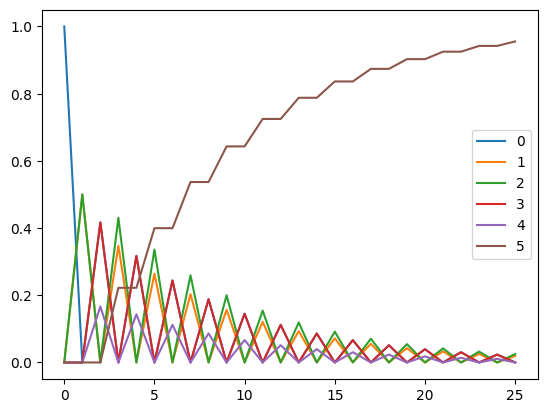

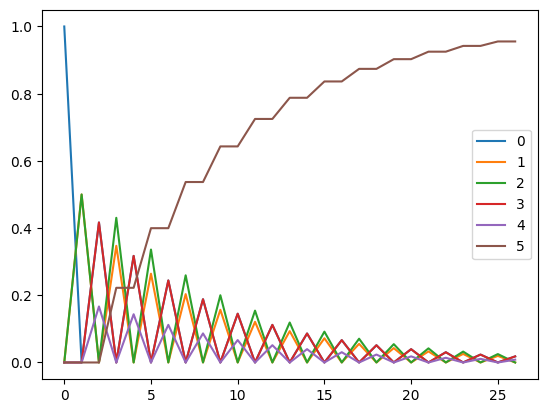

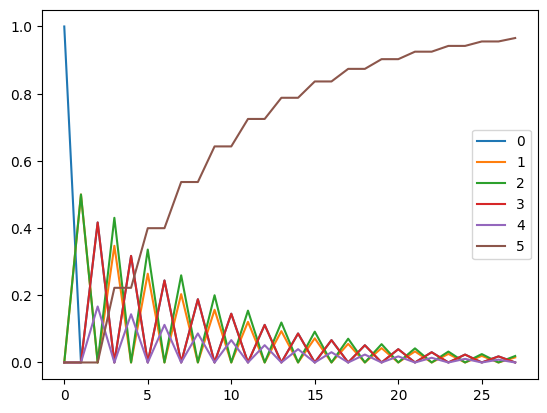

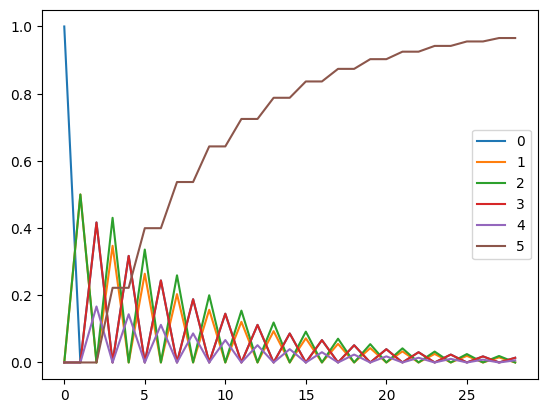

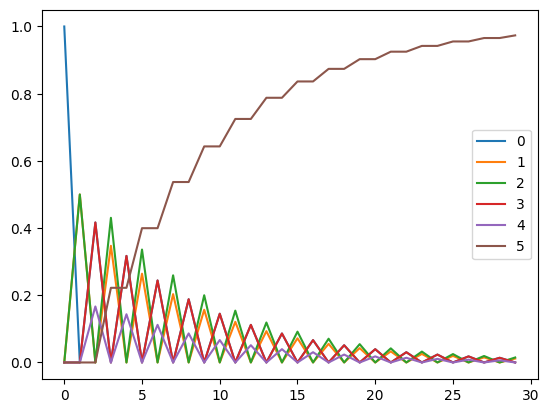

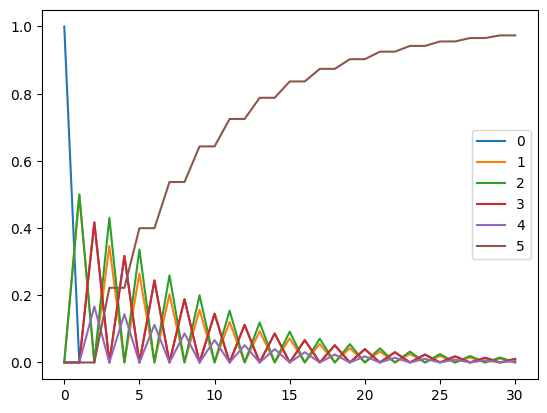

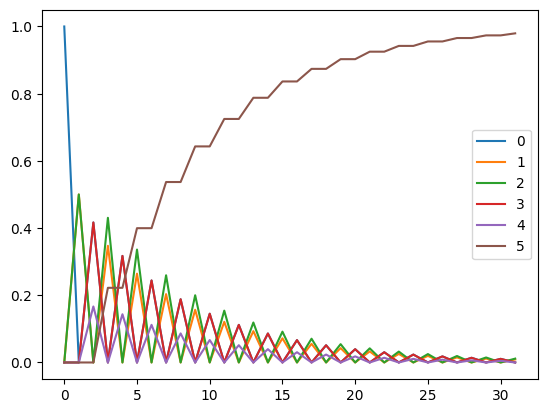

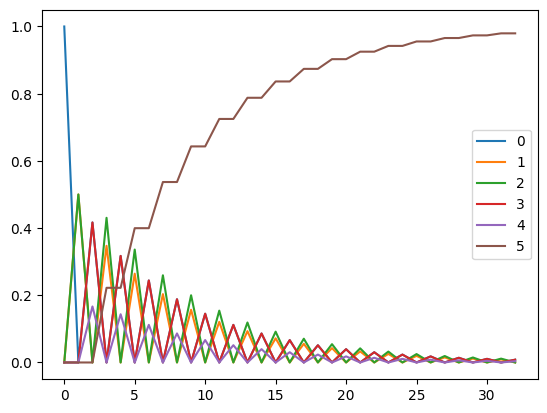

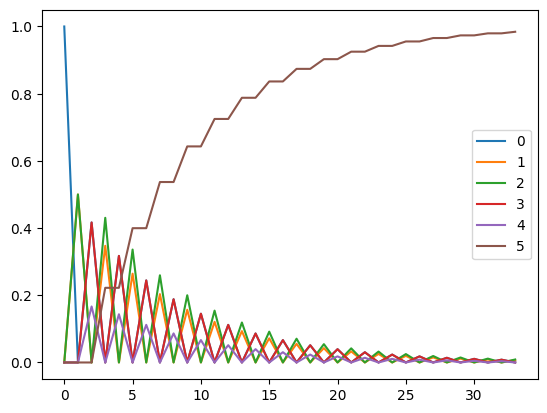

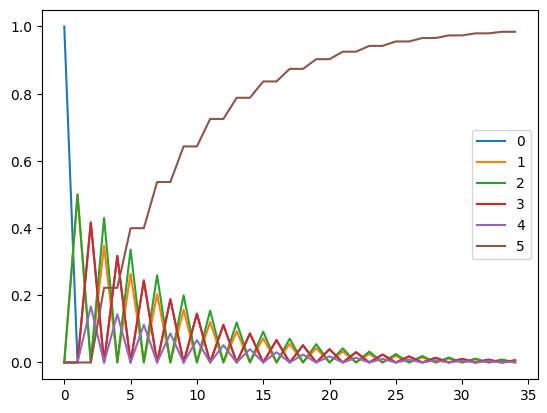

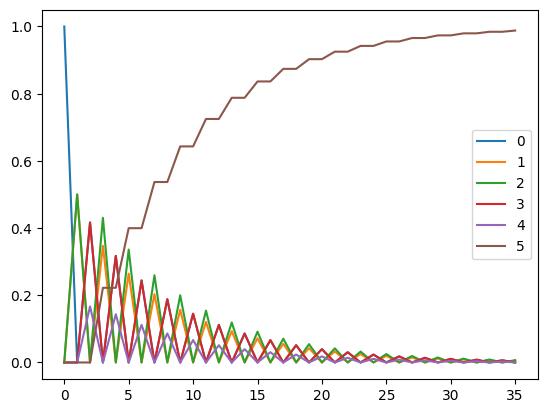

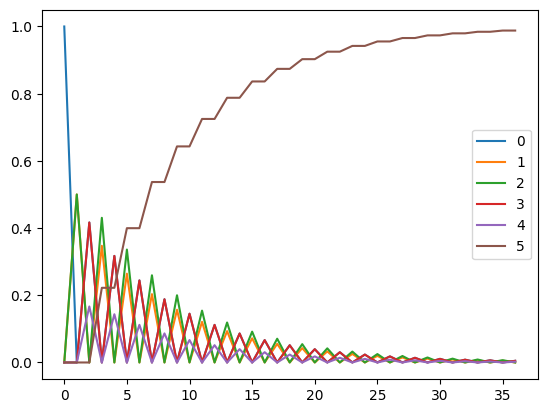

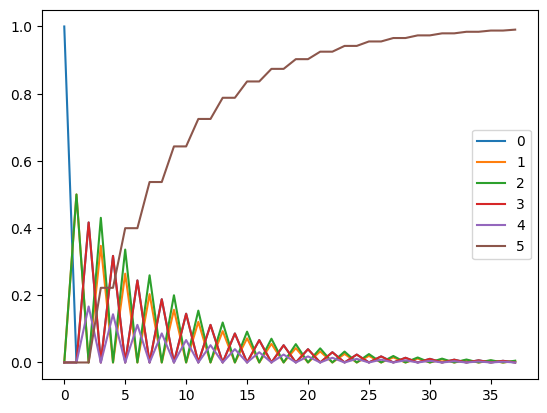

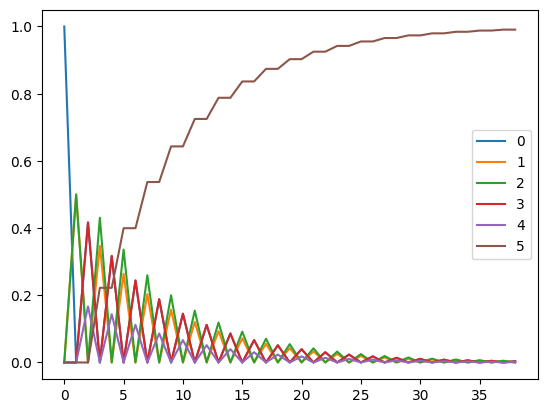

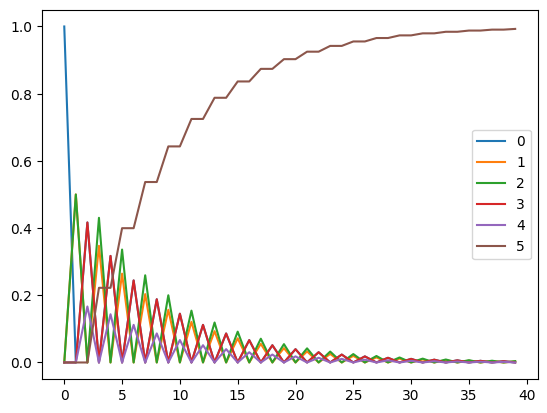

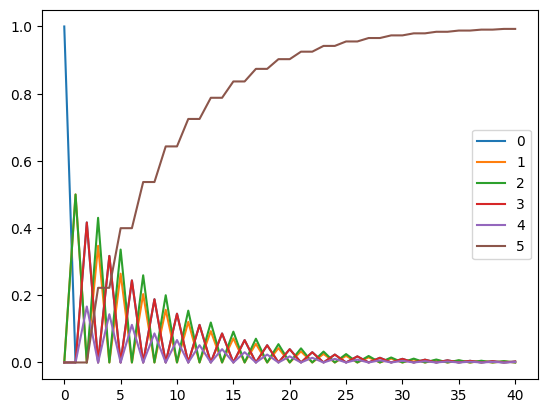

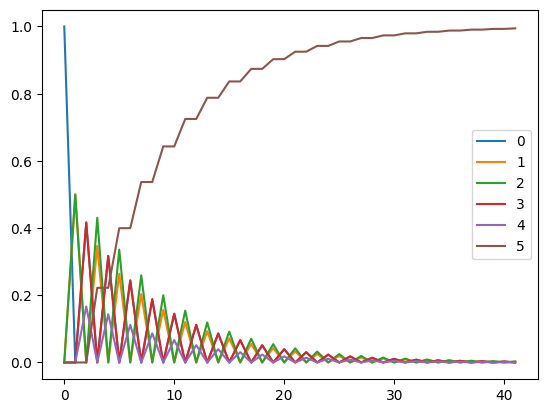

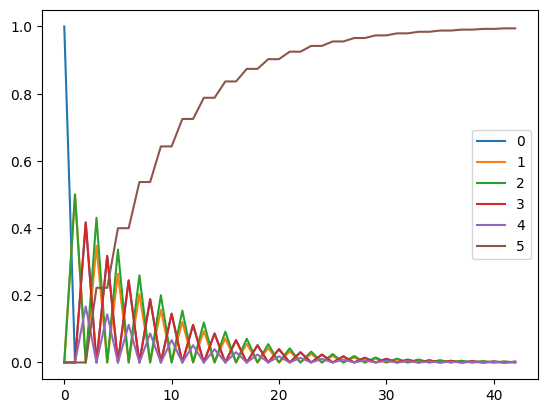

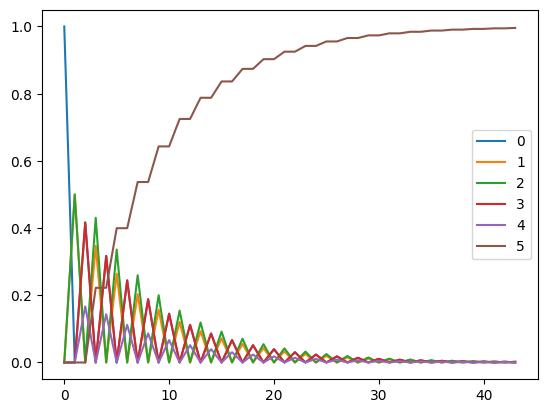

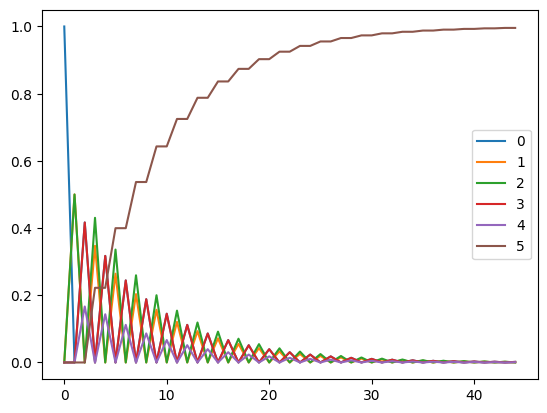

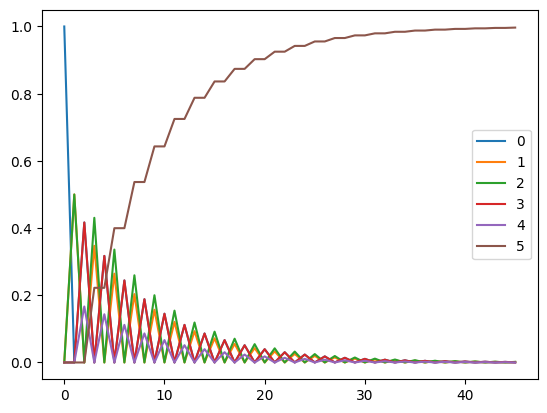

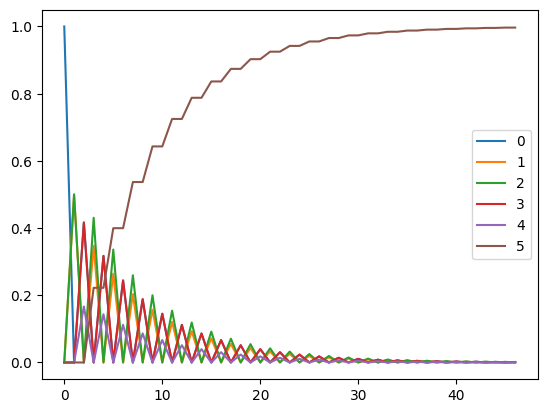

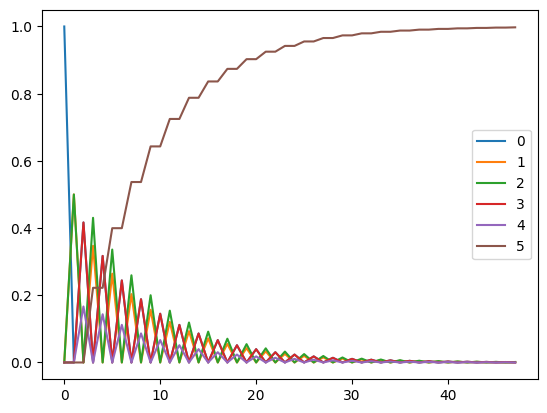

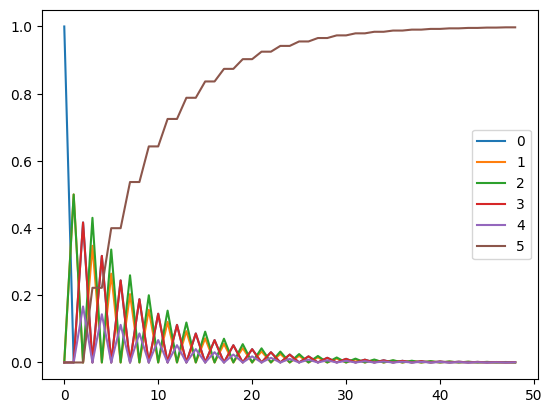

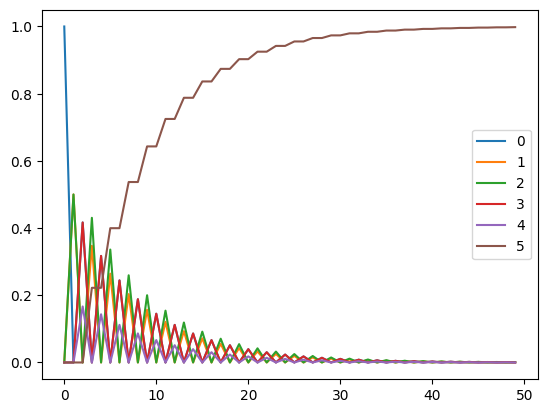

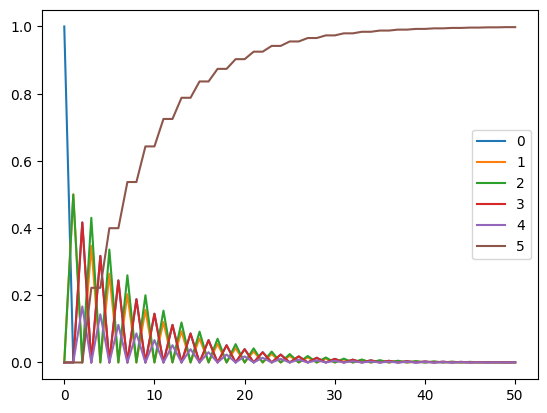

In [ ]:
import numpy as np
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt

#Define the transition matrix
P = np.array([[0, 0.5, 0.5, 0, 0, 0], [0.5, 0, 0, 0.5, 0, 0], [(1/3), 0, 0, (1/3), (1/3), 0], [0, (1/3), (1/3), 0, 0, (1/3)], [0, 0, 0.5, 0, 0, 0.5], [0, 0, 0, 0, 0, 1]], dtype=np.float64)

#Compute powers of P to find probabilities after 3 steps
P3 = np.linalg.matrix_power(P, 3)
print(P3)

#Compute the steady state probability after 100 hours
P100 = np.linalg.matrix_power(P, 100)
print("P100=",P100)

#Graph of Markovian transitions
state = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
stateHist = state
dfStateHist = pd.DataFrame(state)
distr_hist = [[0, 0, 0, 0, 0, 0]]
for x in range(50):
  state=np.dot(state, P)
  #print(state)
  stateHist = np.append(stateHist, state, axis=0)
  dfDistrHist = pd.DataFrame(stateHist)
  dfDistrHist.plot()
plt.show()

In [ ]:
import numpy as np

# Transition matrix
P = np.array([
    [1, 0, 0, 0],
    [0.3, 0.4, 0.3, 0],
    [0, 0.3, 0.4, 0.3],
    [0, 0, 0, 1]
])

# Compute P^3 for the third minute scenario
P3 = np.linalg.matrix_power(P, 3)

# Print the probability of being in state 3 at t=3 starting from state 1
print("Probability of being in state 3 at t=3 from state 1:", P3[1, 3])

# For mean number of steps and absorption probabilities
Q = P[1:3, 1:3]
I = np.eye(Q.shape[0])
N = np.linalg.inv(I - Q)  # Fundamental matrix

# Absorption matrix R
R = P[1:3, [0, 3]]

# NR gives long-term absorption probabilities from states 1 and 2
NR = np.dot(N, R)

print("Mean number of steps to absorption from state 1:", N[0].sum())
print("Mean number of steps to absorption from state 2:", N[1].sum())

print("Absorption probabilities from state 1 to states 0 and 3:", NR[0])
print("Absorption probabilities from state 2 to states 0 and 3:", NR[1])


Probability of being in state 3 at t=3 from state 1: 0.16199999999999998
Mean number of steps to absorption from state 1: 3.3333333333333335
Mean number of steps to absorption from state 2: 3.3333333333333335
Absorption probabilities from state 1 to states 0 and 3: [0.66666667 0.33333333]
Absorption probabilities from state 2 to states 0 and 3: [0.33333333 0.66666667]
